### Sustainable and Entrepreneurial Finance

### Assignment 1 - Portfolio allocation

#### Group 8 - Energy Firms With Available Scope 1 to 3 emissions (TRUCOST)

Useful imports:


In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import prettytable
import plotly.graph_objects as go
import os
import math

%matplotlib inline


#### 0 - Importing and preparing datasets for calculation.

Importing the files and creating the raw pandas data frames (it might take a while...).


In [108]:
# Setting path names

github_path = 'https://github.com/percw/Sustainable_and_Entrepreneurial_Finance/blob/master/Data_Excel'

path_gics = f'{github_path}/Trucost_CO2emissions/GICS_map%202018.xlsx?raw=true'
path_sector = f'{github_path}/Trucost_CO2emissions/sector.xlsx?raw=True'
path_returns = f'{github_path}/MSCI_ESGscores/Returns/monthlyreturns.xlsx?raw=True'
path_caps = f'{github_path}/MSCI_ESGscores/Fundamentals/size.xlsx?raw=True'

# Local paths incase of very slow loading
#path_gics = './Data_Excel/Trucost_CO2emissions/GICS_map 2018.xlsx'
#path_sector = './Data_Excel/Trucost_CO2emissions/sector.xlsx'
#path_returns = './Data_Excel/MSCI_ESGscores/Returns/monthlyreturns.xlsx'
#path_caps = './Data_Excel/MSCI_ESGscores/Fundamentals/size.xlsx'

# Reading excel files and creating pandas data frames
df_gics_raw = pd.read_excel(path_gics)
df_sector_raw = pd.read_excel(path_sector)
df_returns_raw = pd.read_excel(path_returns)
df_caps_raw = pd.read_excel(path_caps)


Renaming and copying the raw dataframes for convenience, so if we need to rerun som code we don't need to wait for the excel files to be loaded.


In [196]:
df_gics = df_gics_raw.copy()
df_sector = df_sector_raw.copy()
df_returns = df_returns_raw.copy()
df_caps = df_caps_raw.copy()


Renaming the index for returns and market caps from '`Unnamed: 0`' to '`date`'.


In [197]:
# Renaming index data column

df_returns.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df_caps.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
display(df_returns)
display(df_caps)


,date,AEA000201011,AEA001501013,AEA002001013,AED000201015,AED000601016,AED000901010,AED001301012,AED001501017,AEDFXA0M6V00,...,ZAE000216537,ZAE000221370,ZAE000248498,ZAE000248506,ZAE000255360,ZAE000255915,ZAE000259479,ZAE000259701,ZAE000265971,ZAE000269890
0,2002-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.057260,NaN,NaN,-0.134138,-0.111384,NaN,NaN,NaN,-0.137366
1,2002-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.111637,NaN,NaN,0.062539,-0.224885,NaN,NaN,NaN,0.065310
2,2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.206354,NaN,NaN,0.007652,0.096314,NaN,NaN,NaN,-0.080122
3,2002-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.084209,NaN,NaN,0.090537,-0.104393,NaN,NaN,NaN,-0.198591
4,2002-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.513709,NaN,NaN,0.088148,0.315774,NaN,NaN,NaN,0.406500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2020-08-31,0.012045,1.087475,-0.050000,-0.005255,0.008674,-0.007831,0.196843,0.000000,0.0,...,-0.050505,-0.010927,-0.043621,-0.194835,-0.029779,-0.094230,-0.116505,0.310495,-0.023609,-0.106407
224,2020-09-30,0.107170,-0.364762,0.205592,0.086644,0.043186,0.059195,0.009310,-0.015075,0.0,...,0.067376,0.037906,0.091790,-0.113688,0.068572,0.107444,0.040293,0.107116,-0.056995,-0.002759
225,2020-10-31,0.008931,-0.310345,-0.019782,0.043485,-0.049642,-0.023100,0.027671,0.030612,0.0,...,-0.079734,-0.002112,0.056919,-0.162197,-0.144279,0.111818,0.158451,-0.102972,0.120879,0.037288
226,2020-11-30,0.021308,0.000000,0.334029,-0.053265,-0.008674,-0.038902,0.218399,-0.108911,0.0,...,-0.115523,0.024140,-0.007411,0.167759,-0.004542,0.000136,0.072948,0.086030,0.352941,-0.155407


,date,AEA000201011,AEA001501013,AEA002001013,AED000201015,AED000601016,AED000901010,AED001301012,AED001501017,AEDFXA0M6V00,...,ZAE000216537,ZAE000221370,ZAE000248498,ZAE000248506,ZAE000255360,ZAE000255915,ZAE000259479,ZAE000259701,ZAE000265971,ZAE000269890
0,2007-01-31,6534700000,758897000.0,1859940000,6350640000,2305090000,NaN,NaN,NaN,NaN,...,NaN,2.072570e+09,NaN,NaN,18552700000,12380100000,NaN,NaN,NaN,1.237120e+09
1,2007-02-28,6611120000,751838000.0,2235750000,6503290000,2391120000,NaN,NaN,NaN,NaN,...,NaN,1.966200e+09,NaN,NaN,19039600000,12764800000,NaN,NaN,NaN,1.233470e+09
2,2007-03-31,5980720000,838744000.0,1940260000,5319980000,2506660000,NaN,NaN,NaN,NaN,...,NaN,2.143880e+09,NaN,NaN,16878100000,12948100000,NaN,NaN,NaN,1.202500e+09
3,2007-04-30,6534350000,714754000.0,2329490000,6060680000,2630020000,NaN,NaN,NaN,NaN,...,NaN,2.478330e+09,NaN,NaN,18710200000,13936100000,NaN,NaN,NaN,1.401440e+09
4,2007-05-31,7647060000,923382000.0,3405840000,8077450000,2808010000,NaN,NaN,NaN,NaN,...,NaN,2.277380e+09,NaN,NaN,17881000000,12799400000,NaN,NaN,NaN,1.362000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2020-08-31,10494400000,NaN,4345770000,8082950000,1412400000,1.888480e+09,1.447930e+09,261378000.0,1.347090e+10,...,5.543370e+09,NaN,1.007220e+09,1.007220e+09,3111030000,3866810000,2.096430e+09,NaN,2.531580e+09,1.340430e+09
164,2020-09-30,10702800000,NaN,4302950000,8516670000,1331360000,1.825310e+09,1.517110e+09,291872000.0,1.347090e+10,...,5.176610e+09,NaN,1.027260e+09,1.027260e+09,2915080000,4525010000,2.436750e+09,NaN,2.561640e+09,1.387060e+09
165,2020-10-31,11119500000,NaN,5865720000,8201230000,1319780000,1.823130e+09,1.795500e+09,250487000.0,1.347090e+10,...,4.598340e+09,NaN,1.037060e+09,1.037060e+09,2718960000,4536810000,2.692790e+09,NaN,3.649600e+09,1.198440e+09
166,2020-11-30,11517300000,NaN,6507950000,8832100000,1447130000,1.901550e+09,1.943750e+09,250487000.0,1.347090e+10,...,6.058280e+09,NaN,1.178770e+09,1.178770e+09,3558920000,6040410000,3.266010e+09,NaN,3.722370e+09,1.528570e+09


Getting the ISIN codes for the energy companies.


In [198]:
industry_code = 1010.0  # based on Global Industry Classification Standard GICS
df_energy = df_sector.loc[df_sector['GICSIG'] == industry_code]
energy_isin = df_energy['ISIN'].values.tolist()


Getting the returns for the companies matching the ISIN codes in `energy_isin`.


In [199]:
# List of all ISIN codes to iterate through
return_cols = df_returns.columns.values.tolist()
display(len(return_cols))
display(len(return_cols) == df_returns.shape[1])

# Creating a list with all the ISIN Energy codes that the returns.xlsx datasheet contains
both = []
for c in return_cols:
    if c in energy_isin:
        both.append(c)


5141

True

We have 5141 columns, and the same amount of columns in df_returns.


Checking the shape and general characteristics of our new list.


In [200]:
display(return_cols[:4])
display(energy_isin[:4])
display(both[:4])
display(len(return_cols))
display(len(energy_isin))
display(len(both))


['date', 'AEA000201011', 'AEA001501013', 'AEA002001013']

['AED000701014', 'AN8068571086', 'ARP9897X1319', 'ARPERE010103']

['AN8068571086', 'AU000000AOE6', 'AU000000ERA9', 'AU000000ORG5']

5141

773

223

Manually checking that the first four columns and companies to the ones displayed above in `df_returns`.


Inserting the date column.


In [201]:
if 'date' not in energy_isin:
    energy_isin.insert(0, 'date')

energy_isin[:4]


['date', 'AED000701014', 'AN8068571086', 'ARP9897X1319']

Putting together the return data for the energy companies.


In [202]:
nrg_returns = df_returns[df_returns.columns.intersection(energy_isin)]
display(nrg_returns)

# Checking the datatypes.
display(nrg_returns.dtypes.unique())


,date,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,...,US8475601097,US86764P1093,RU000A0B6NK6,US87612G1013,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
0,2002-01-31,0.115662,0.152793,0.005659,-0.031864,-0.091918,NaN,NaN,NaN,-0.039490,...,NaN,0.021051,NaN,NaN,0.002783,0.040387,-0.027370,0.078207,0.455740,0.049202
1,2002-02-28,0.004551,-0.076059,0.075563,0.034254,0.947644,NaN,NaN,NaN,0.026525,...,NaN,0.032410,NaN,NaN,0.002702,0.207248,-0.255487,-0.050850,-0.100205,0.071560
2,2002-03-31,0.069747,0.250782,0.032138,0.046824,-0.051075,NaN,NaN,NaN,-0.040052,...,NaN,0.018067,NaN,NaN,0.012703,-0.055308,-0.157891,0.131839,-0.102242,0.048680
3,2002-04-30,-0.011214,0.161899,0.026068,0.072392,0.106704,NaN,NaN,NaN,-0.056528,...,NaN,0.036674,NaN,NaN,0.108710,0.130936,0.497679,0.096313,0.023116,0.123294
4,2002-05-31,-0.033508,-0.076482,-0.084686,0.054394,-0.104949,NaN,NaN,NaN,0.000000,...,NaN,-0.128155,NaN,NaN,0.063592,-0.111495,-0.186524,0.008259,-0.015311,-0.022361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2020-08-31,0.056431,0.025929,0.059829,-0.030567,0.221436,-0.051895,-0.087717,0.192621,0.001988,...,0.0,0.000000,-0.040000,-0.015564,-0.087904,-0.027463,0.048380,0.000000,0.286645,0.082327
224,2020-09-30,0.001871,0.038956,0.102151,0.026130,0.412873,-0.301476,0.253637,-0.037486,-0.034939,...,0.0,0.000000,-0.020833,-0.096853,-0.014810,-0.026711,0.062879,0.000000,-0.143275,0.036017
225,2020-10-31,-0.194313,-0.026587,-0.112195,-0.210594,-0.255603,0.193846,-0.000491,-0.039670,-0.147194,...,0.0,0.000000,-0.021277,-0.199779,-0.023121,-0.232324,-0.086246,0.000000,-0.258657,-0.096972
226,2020-11-30,0.037976,-0.019773,-0.052198,-0.102304,-0.095238,-0.081615,-0.061808,-0.135534,-0.106459,...,0.0,0.000000,-0.108696,0.190719,-0.020107,-0.009433,-0.000533,0.000000,-0.083209,-0.291075


array([dtype('<M8[ns]'), dtype('float64')], dtype=object)

The dataset looks good. We have only float64 values which is as expected and good. Additionally we see that we have 223 columns which is the same as the length of the ISIN list created in the codeblock above.


Now we can filter on the targeted dates which is from 01.01.2005 to 31.12.2020. We'll use a mask to get the observations in this timeframe.


In [203]:
start_date = '2005-01-01'
end_date = '2020-12-31'

# Greater than or equal to the start date and smaller than or equal the end date
mask = (nrg_returns['date'] >= start_date) & (nrg_returns['date'] <= end_date)

nrg_returns = nrg_returns.loc[mask]

display(nrg_returns.iloc[0][0])
display(nrg_returns.iloc[-1][0])


Timestamp('2005-01-31 00:00:00')

Timestamp('2020-12-31 00:00:00')

Here we can see that the first and the last column has the correct dates.


Dropping the `NaN` values for companies that have more than 36 months of no return data.


In [204]:
# Drop all companies that have 36 NAN values (3 years) or more
years = 3
months = 12
too_many_nans = years*months

nrg_returns = nrg_returns.dropna(
    thresh=len(nrg_returns) - too_many_nans, axis=1)
nrg_returns


,date,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
36,2005-01-31,0.012603,-0.087586,0.032408,0.001413,-0.058855,NaN,0.053326,-0.221404,-0.000471,...,-0.106096,NaN,-0.031204,NaN,0.047824,-0.035393,-0.046450,-0.060108,0.028704,0.088215
37,2005-02-28,0.063502,-0.006316,0.509758,0.008180,0.818187,NaN,0.037500,0.031757,-0.012241,...,0.150111,NaN,0.161942,NaN,-0.069058,0.322805,0.092083,0.108183,0.094693,-0.087507
38,2005-03-31,0.093039,0.131431,0.188845,0.023138,0.373450,NaN,0.130329,0.230611,0.163489,...,0.057778,NaN,0.080660,NaN,-0.008869,0.196423,0.077830,0.183483,0.258207,0.231228
39,2005-04-30,-0.038401,-0.053780,-0.130408,0.031135,-0.114356,NaN,0.049456,0.038771,0.140516,...,0.040317,NaN,0.107051,NaN,-0.067113,0.142520,0.045476,0.067322,-0.103228,0.002223
40,2005-05-31,-0.027085,-0.122518,-0.048968,-0.014060,-0.006077,NaN,0.004279,0.031982,0.000359,...,0.123802,NaN,-0.066758,NaN,0.083772,-0.118698,-0.084998,-0.109858,-0.011597,-0.042448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2020-08-31,0.056431,0.025929,0.059829,-0.030567,0.221436,-0.051895,-0.087717,0.192621,0.001988,...,0.079365,0.0,0.000000,-0.040000,-0.087904,-0.027463,0.048380,0.000000,0.286645,0.082327
224,2020-09-30,0.001871,0.038956,0.102151,0.026130,0.412873,-0.301476,0.253637,-0.037486,-0.034939,...,-0.022058,0.0,0.000000,-0.020833,-0.014810,-0.026711,0.062879,0.000000,-0.143275,0.036017
225,2020-10-31,-0.194313,-0.026587,-0.112195,-0.210594,-0.255603,0.193846,-0.000491,-0.039670,-0.147194,...,-0.146617,0.0,0.000000,-0.021277,-0.023121,-0.232324,-0.086246,0.000000,-0.258657,-0.096972
226,2020-11-30,0.037976,-0.019773,-0.052198,-0.102304,-0.095238,-0.081615,-0.061808,-0.135534,-0.106459,...,0.215860,0.0,0.000000,-0.108696,-0.020107,-0.009433,-0.000533,0.000000,-0.083209,-0.291075


Saving a copy for Question 3 called `nrg_returns_date_column` without the `date` as index.


In [205]:
nrg_returns_date_column = nrg_returns.copy()  # For Q3


Here we set `date` as the index column on the nrg_returns dataset.


In [206]:
if 'date' in nrg_returns.columns.values.tolist():
    nrg_returns.set_index('date', inplace=True)
display(nrg_returns.isnull().sum().sum())
display(nrg_returns)


526

,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,BMG5320C1082,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,0.012603,-0.087586,0.032408,0.001413,-0.058855,NaN,0.053326,-0.221404,-0.000471,-0.016535,...,-0.106096,NaN,-0.031204,NaN,0.047824,-0.035393,-0.046450,-0.060108,0.028704,0.088215
2005-02-28,0.063502,-0.006316,0.509758,0.008180,0.818187,NaN,0.037500,0.031757,-0.012241,-0.068279,...,0.150111,NaN,0.161942,NaN,-0.069058,0.322805,0.092083,0.108183,0.094693,-0.087507
2005-03-31,0.093039,0.131431,0.188845,0.023138,0.373450,NaN,0.130329,0.230611,0.163489,0.122907,...,0.057778,NaN,0.080660,NaN,-0.008869,0.196423,0.077830,0.183483,0.258207,0.231228
2005-04-30,-0.038401,-0.053780,-0.130408,0.031135,-0.114356,NaN,0.049456,0.038771,0.140516,0.000000,...,0.040317,NaN,0.107051,NaN,-0.067113,0.142520,0.045476,0.067322,-0.103228,0.002223
2005-05-31,-0.027085,-0.122518,-0.048968,-0.014060,-0.006077,NaN,0.004279,0.031982,0.000359,-0.062137,...,0.123802,NaN,-0.066758,NaN,0.083772,-0.118698,-0.084998,-0.109858,-0.011597,-0.042448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.056431,0.025929,0.059829,-0.030567,0.221436,-0.051895,-0.087717,0.192621,0.001988,0.292894,...,0.079365,0.0,0.000000,-0.040000,-0.087904,-0.027463,0.048380,0.000000,0.286645,0.082327
2020-09-30,0.001871,0.038956,0.102151,0.026130,0.412873,-0.301476,0.253637,-0.037486,-0.034939,-0.132470,...,-0.022058,0.0,0.000000,-0.020833,-0.014810,-0.026711,0.062879,0.000000,-0.143275,0.036017
2020-10-31,-0.194313,-0.026587,-0.112195,-0.210594,-0.255603,0.193846,-0.000491,-0.039670,-0.147194,-0.097708,...,-0.146617,0.0,0.000000,-0.021277,-0.023121,-0.232324,-0.086246,0.000000,-0.258657,-0.096972


Our first plot. Let's plot the monthly returns with date on the x-axis and the return rate on the y-axis.


Text(0, 0.5, 'Returns')

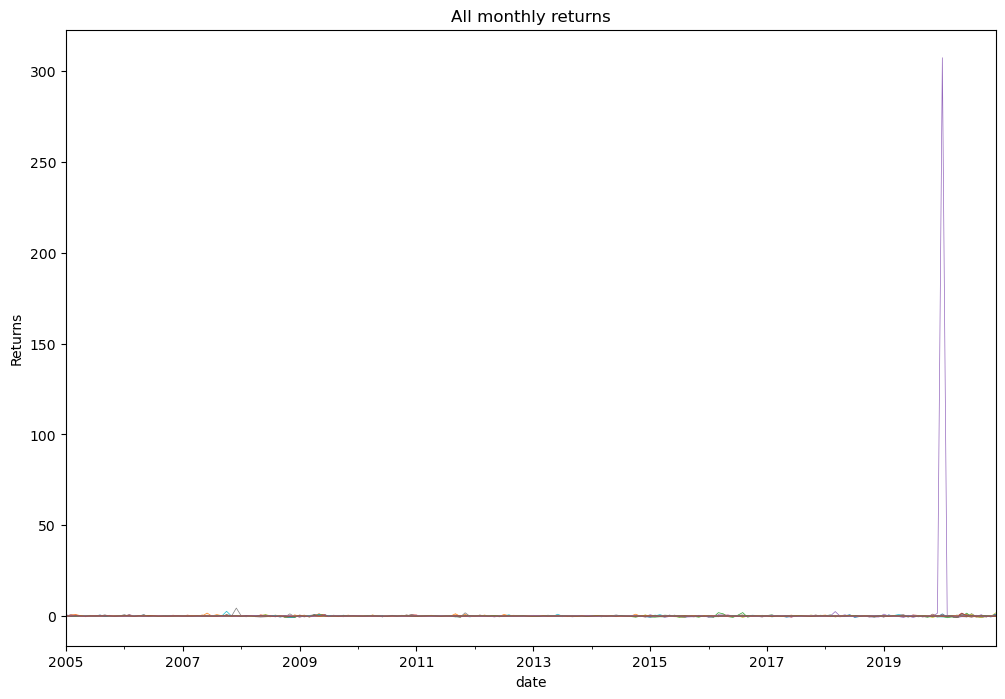

In [207]:
# Define the plot (plot all lines)

ax = nrg_returns.plot(linewidth=0.5, figsize=(12, 8))
ax.get_legend().remove()  # Removing the legend
ax.set_title('All monthly returns')  # Title
ax.set_ylabel('Returns')  # y-axis label


Here we can see that we have some huge outliers distorting the plot. Let's create a treshold of 1000%.


In [208]:
outlier_threshold = 10
outlier_companies = nrg_returns.loc[:, nrg_returns[(
    nrg_returns > outlier_threshold)].any(axis=0)]
outlier_list = outlier_companies.columns.values.tolist()
outlier_list


['IE00BLNN3691']

We have only one outlier, thats good. Let's remove it.


In [209]:
if outlier_list[0] in nrg_returns.columns.values.tolist():
    nrg_returns = nrg_returns.drop(columns=outlier_list)

nrg_returns


,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,BMG5320C1082,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,0.012603,-0.087586,0.032408,0.001413,-0.058855,NaN,0.053326,-0.221404,-0.000471,-0.016535,...,-0.106096,NaN,-0.031204,NaN,0.047824,-0.035393,-0.046450,-0.060108,0.028704,0.088215
2005-02-28,0.063502,-0.006316,0.509758,0.008180,0.818187,NaN,0.037500,0.031757,-0.012241,-0.068279,...,0.150111,NaN,0.161942,NaN,-0.069058,0.322805,0.092083,0.108183,0.094693,-0.087507
2005-03-31,0.093039,0.131431,0.188845,0.023138,0.373450,NaN,0.130329,0.230611,0.163489,0.122907,...,0.057778,NaN,0.080660,NaN,-0.008869,0.196423,0.077830,0.183483,0.258207,0.231228
2005-04-30,-0.038401,-0.053780,-0.130408,0.031135,-0.114356,NaN,0.049456,0.038771,0.140516,0.000000,...,0.040317,NaN,0.107051,NaN,-0.067113,0.142520,0.045476,0.067322,-0.103228,0.002223
2005-05-31,-0.027085,-0.122518,-0.048968,-0.014060,-0.006077,NaN,0.004279,0.031982,0.000359,-0.062137,...,0.123802,NaN,-0.066758,NaN,0.083772,-0.118698,-0.084998,-0.109858,-0.011597,-0.042448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.056431,0.025929,0.059829,-0.030567,0.221436,-0.051895,-0.087717,0.192621,0.001988,0.292894,...,0.079365,0.0,0.000000,-0.040000,-0.087904,-0.027463,0.048380,0.000000,0.286645,0.082327
2020-09-30,0.001871,0.038956,0.102151,0.026130,0.412873,-0.301476,0.253637,-0.037486,-0.034939,-0.132470,...,-0.022058,0.0,0.000000,-0.020833,-0.014810,-0.026711,0.062879,0.000000,-0.143275,0.036017
2020-10-31,-0.194313,-0.026587,-0.112195,-0.210594,-0.255603,0.193846,-0.000491,-0.039670,-0.147194,-0.097708,...,-0.146617,0.0,0.000000,-0.021277,-0.023121,-0.232324,-0.086246,0.000000,-0.258657,-0.096972


Now we can create a new plot without the outlier.


Text(0, 0.5, 'Returns')

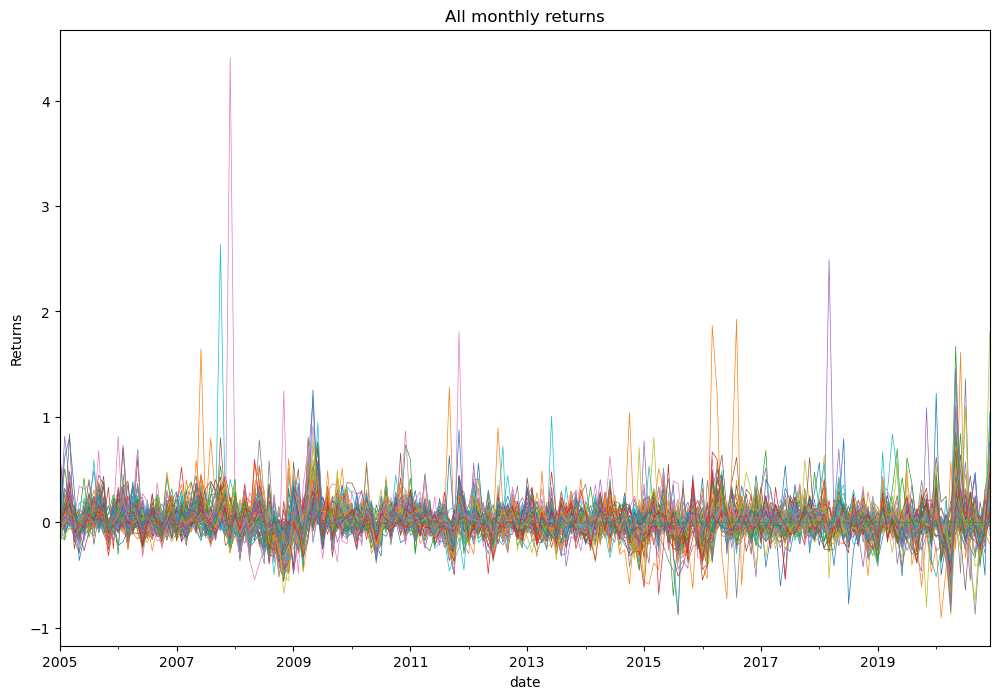

In [210]:
# Define the plot (plot all lines)

ax = nrg_returns.plot(linewidth=0.5, figsize=(12, 8))
ax.get_legend().remove()  # removing the legend
ax.set_title('All monthly returns')  # Title
ax.set_ylabel('Returns')  # y-axis label


This plot looks much better.


Now we want to export the new dataframe to a csv file.


In [211]:
# To get the current working directory
directory = os.getcwd()

# Defining subfolder path
path = directory+'/Clean_Data'

# Checking whether the specified path already exists - will avoid errors when re-running
if os.path.isdir(path):
    print(f'Path {path} already exists')
    pass

# If not, create subfolder
else:
    os.mkdir('Clean_Data')

# Saving the clean merged dataframe as a csv in a subfolder
nrg_returns.to_csv('Clean_Data/nrg_returns.csv')
# files.download('nrg_returns.csv')


Path /Users/pcw/Documents/SMT Master/EPFL/Finance/Clean_Data already exists


#### Getting Market Caps


Taking a closer look at the Market Cap data.


In [212]:
df_caps


,date,AEA000201011,AEA001501013,AEA002001013,AED000201015,AED000601016,AED000901010,AED001301012,AED001501017,AEDFXA0M6V00,...,ZAE000216537,ZAE000221370,ZAE000248498,ZAE000248506,ZAE000255360,ZAE000255915,ZAE000259479,ZAE000259701,ZAE000265971,ZAE000269890
0,2007-01-31,6534700000,758897000.0,1859940000,6350640000,2305090000,NaN,NaN,NaN,NaN,...,NaN,2.072570e+09,NaN,NaN,18552700000,12380100000,NaN,NaN,NaN,1.237120e+09
1,2007-02-28,6611120000,751838000.0,2235750000,6503290000,2391120000,NaN,NaN,NaN,NaN,...,NaN,1.966200e+09,NaN,NaN,19039600000,12764800000,NaN,NaN,NaN,1.233470e+09
2,2007-03-31,5980720000,838744000.0,1940260000,5319980000,2506660000,NaN,NaN,NaN,NaN,...,NaN,2.143880e+09,NaN,NaN,16878100000,12948100000,NaN,NaN,NaN,1.202500e+09
3,2007-04-30,6534350000,714754000.0,2329490000,6060680000,2630020000,NaN,NaN,NaN,NaN,...,NaN,2.478330e+09,NaN,NaN,18710200000,13936100000,NaN,NaN,NaN,1.401440e+09
4,2007-05-31,7647060000,923382000.0,3405840000,8077450000,2808010000,NaN,NaN,NaN,NaN,...,NaN,2.277380e+09,NaN,NaN,17881000000,12799400000,NaN,NaN,NaN,1.362000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2020-08-31,10494400000,NaN,4345770000,8082950000,1412400000,1.888480e+09,1.447930e+09,261378000.0,1.347090e+10,...,5.543370e+09,NaN,1.007220e+09,1.007220e+09,3111030000,3866810000,2.096430e+09,NaN,2.531580e+09,1.340430e+09
164,2020-09-30,10702800000,NaN,4302950000,8516670000,1331360000,1.825310e+09,1.517110e+09,291872000.0,1.347090e+10,...,5.176610e+09,NaN,1.027260e+09,1.027260e+09,2915080000,4525010000,2.436750e+09,NaN,2.561640e+09,1.387060e+09
165,2020-10-31,11119500000,NaN,5865720000,8201230000,1319780000,1.823130e+09,1.795500e+09,250487000.0,1.347090e+10,...,4.598340e+09,NaN,1.037060e+09,1.037060e+09,2718960000,4536810000,2.692790e+09,NaN,3.649600e+09,1.198440e+09
166,2020-11-30,11517300000,NaN,6507950000,8832100000,1447130000,1.901550e+09,1.943750e+09,250487000.0,1.347090e+10,...,6.058280e+09,NaN,1.178770e+09,1.178770e+09,3558920000,6040410000,3.266010e+09,NaN,3.722370e+09,1.528570e+09


Extracting the intersection between the energy companies that are in the the returns dataset (`returns_isin`) and the market caps (`df_caps`).


In [213]:
returns_isin = nrg_returns.columns.values.tolist()
nrg_caps = df_caps[df_returns.columns.intersection(returns_isin)]
nrg_caps


,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,BMG5320C1082,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
0,74825700000,5.135480e+08,3079170000,6.037320e+09,3.372720e+09,NaN,3.423190e+09,1555140000,3010950000,2.424230e+09,...,6471650000,1.646810e+10,7.660140e+09,NaN,4416550000,32791300000,16095200000,1.846830e+10,18410400000,2.134640e+10
1,74012500000,5.645100e+08,3678900000,6.068140e+09,3.591960e+09,NaN,4.794950e+09,1587330000,3043510000,2.304480e+09,...,6610540000,1.622220e+10,7.819090e+09,NaN,4562190000,34760700000,16124300000,1.899390e+10,17123300000,2.019070e+10
2,81437400000,7.861750e+08,4286560000,6.333870e+09,3.940580e+09,NaN,5.134680e+09,1766810000,3141950000,2.416050e+09,...,6929820000,1.658860e+10,8.547130e+09,NaN,4287570000,38959300000,17015200000,2.016770e+10,16507100000,2.090860e+10
3,87013400000,8.771610e+08,3995060000,6.589470e+09,4.171120e+09,NaN,5.220020e+09,1770770000,3144040000,2.155100e+09,...,7135780000,1.648120e+10,9.173000e+09,NaN,4208900000,38555600000,17666300000,1.999130e+10,16494200000,2.173170e+10
4,91774800000,1.210180e+09,3620750000,6.334960e+09,4.341900e+09,NaN,5.632360e+09,1949750000,3636350000,2.562450e+09,...,8087210000,1.682560e+10,9.680650e+09,NaN,4125110000,40965700000,19019700000,2.137570e+10,16691800000,2.271890e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,26387800000,NaN,476420000,7.273810e+09,2.467690e+08,7.037400e+08,3.692620e+09,2007750000,1243010000,NaN,...,1683270000,NaN,NaN,818854000.0,10271300000,21444000000,25193500000,NaN,3844310000,5.154680e+09
164,21660000000,NaN,396511000,5.423190e+09,1.815220e+08,7.678170e+08,3.559380e+09,1947860000,1041240000,NaN,...,1423030000,NaN,NaN,811556000.0,9602990000,17664000000,23846400000,NaN,2667690000,4.877320e+09
165,20796900000,NaN,389036000,4.949720e+09,1.852240e+08,7.726980e+08,3.452640e+09,1605490000,959765000,NaN,...,1616840000,NaN,NaN,729863000.0,9199600000,15744700000,23288700000,NaN,2562820000,3.275830e+09
166,28940300000,NaN,420255000,6.700900e+09,2.234230e+08,1.004980e+09,4.946650e+09,1730840000,969609000,NaN,...,2092300000,NaN,NaN,932591000.0,11328700000,21926800000,25461000000,NaN,3702360000,4.933380e+09


We will for this dataset also set the `date` column as the index.


In [214]:
if 'date' in nrg_caps.columns.values.tolist():  # date as index
    nrg_caps.set_index('date', inplace=True)

nrg_returns.isnull().sum().sum()  # Count NANs


526

Now we are ready to start answering the questions.


#### QI - Annual average return and annualized volatility for all individual assets over the period 2005-2020. Correlation between individual average returns and volatility individually and between both metrics.


We will loop through the columns representing energy returns (`nrg_returns`). Using method `.std()` to get standard deviation.


In [215]:
df_q1 = pd.DataFrame([])

for a in nrg_returns.columns.values.tolist():

    # Get annualized average return
    avg_monthly = nrg_returns[a].mean()
    annualized_avg_return = avg_monthly*months

    # Get annualized volatility
    std_monthly = nrg_returns[a].std()
    annualized_volatility = std_monthly*math.sqrt(months)

    # Create series
    asset = {'AAR': annualized_avg_return, 'volatility': annualized_volatility}
    series = pd.Series(data=asset, index=['AAR', 'volatility'])

    # Concat
    df_q1 = pd.concat([df_q1, series.rename(a)], axis=1)

# Transpose df for readability
df_q1 = df_q1.T

# Show
display(df_q1.head())
display(df_q1.shape)


,AAR,volatility
AN8068571086,0.070937,0.372584
AU000000AOE6,0.233029,0.423224
AU000000ERA9,-0.016714,0.561325
AU000000ORG5,0.087845,0.368280
AU000000PDN8,0.277071,0.972955


(185, 2)

Let's have a look a the descriptive statistics of the newly created dataset and plot the variance and annualized average returns.


,AAR,volatility
count,185.000000,185.000000
mean,0.114505,0.440064
std,0.103810,0.155904
min,-0.244423,0.155693
25%,0.067506,0.347150
50%,0.111135,0.420355
75%,0.167964,0.508374
max,0.452643,1.243948


Text(0.5, 1.0, 'Annualized average Return and Volatility')

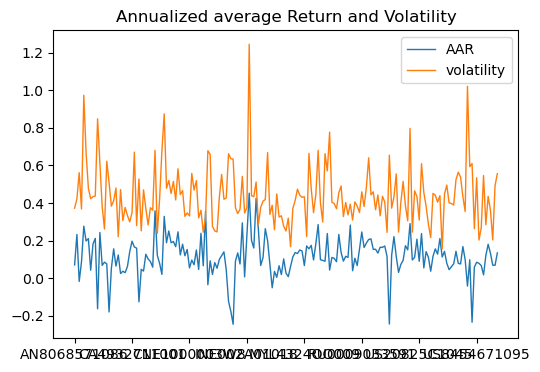

In [216]:
display(df_q1.describe())
ax = df_q1.plot(linewidth=1, figsize=(6, 4))
ax.set_title('Annualized average Return and Volatility')  # Title


Let's check if our data is correct by manually calculating the AAR and volatility for the company with ISIN: `AU000000ERA9`.


In [217]:
nrg_returns['AU000000ERA9'].describe()


count    192.000000
mean      -0.001393
std        0.162041
min       -0.697007
25%       -0.087002
50%       -0.016616
75%        0.073296
max        0.681818
Name: AU000000ERA9, dtype: float64

In [218]:
# Verify that this is correct by manually doing the same for the 2nd asset

# AAR
check_aar = nrg_returns['AU000000ERA9'].mean()
check_aar_annualized = check_aar*months

# Volatility
check_std = nrg_returns['AU000000ERA9'].std()
check_std_annualized = check_std*math.sqrt(months)

rounds = 50

display(round(check_aar_annualized, rounds) == round(df_q1.iloc[2][0], rounds))
display(round(check_std_annualized, rounds) == round(df_q1.iloc[2][1], rounds))


True

True

We can see that the values are equal even with 50 decimals.


#### Q.II - Equally-weighted and value-weighted portfolio with monthly rebalancing over the period 2005-2020. Report the following statistics for both portfolios: annualized average return, annualized volatility, minimum return, maximum return, and Sharpe ratio. Plot the time series of return for both portfolios

#### Q.II.I Building dataset


In [219]:
risk_free_rate = 0.05


In [222]:
# Building melted df with market caps

df_q2 = nrg_returns_date_column.drop(columns=['IE00BLNN3691']).copy()
df_q2 = df_q2.melt(id_vars=['date'], var_name='ISIN',
                   value_name='monthly_return')

df_q2['date'] = pd.to_datetime(df_q2['date'], infer_datetime_format=True)
df_q2['year'] = df_q2.date.dt.year
df_q2['month'] = df_q2.date.dt.month
df_q2 = df_q2[['date', 'year', 'month', 'ISIN', 'monthly_return']].copy()

df_size = df_caps.melt(
    id_vars=['date'], var_name='ISIN', value_name='market_cap')
df_q2 = pd.merge(df_q2, df_size, how='left', on=('date', 'ISIN'))

df_q2


,date,year,month,ISIN,monthly_return,market_cap
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN
...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09


In [223]:
# Annual return (sum of monthly returns per year per ISIN)
an_rtrn = df_q2[['year', 'ISIN', 'monthly_return']
                ].groupby(['year', 'ISIN']).sum().copy()


def annual_return(row):
    ISIN = row['ISIN']
    year = row['year']
    return an_rtrn.loc[(year, ISIN)][0]


df_q2['annual_returns'] = df_q2.apply(annual_return, axis=1)
df_q2


,date,year,month,ISIN,monthly_return,market_cap,annual_returns
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN,0.468026
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN,0.468026
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN,0.468026
...,...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09,1.030514
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09,1.030514
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09,1.030514
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09,1.030514


#### Q.III.II Building the Equally Weighted Portfolio


In [224]:
# Building equally weighted portfolio with monthly rebalancing
df_q2_e = df_q2.copy()

num_assets = len(df_q2_e.columns.values.tolist())
equal_weight = 1 / num_assets
df_q2_e.head(2)


,date,year,month,ISIN,monthly_return,market_cap,annual_returns
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026


In [225]:
# Computing the AAR of the equally-weighted portfolio for the 15 years under observation
AAR = df_q2_e[['ISIN', 'monthly_return']].groupby(
    'ISIN').apply(lambda x: x.mean()*months).copy()


def AAR_func(row):
    ISIN = row['ISIN']
    return AAR.loc[(ISIN)][0]


df_q2_e['ew_AAR'] = df_q1.AAR.mean()

df_q2_e['ew_annualized_volatility'] = df_q2_e.monthly_return.std() * \
    math.sqrt(months)

# Computing the annual return of the equally-weighted portolio
eq_weight_port_df = df_q2_e[['year', 'annual_returns']].groupby('year').mean()


def eq_weight_port_func(row):
    year = row['year']
    return eq_weight_port_df.loc[year][0]


df_q2_e['ew_annual_return'] = df_q2_e.apply(eq_weight_port_func, axis=1)

# Computing the monthly return of the value-weighted portfolio
ew_monthly_return_df = df_q2_e[['year', 'month', 'monthly_return']].groupby([
                                                                            'year', 'month']).sum()


def ew_monthly_return_func(row):
    year = row['year']
    month = row['month']
    return ew_monthly_return_df.loc[(year, month)][0]


df_q2_e['ew_monthly_return'] = df_q2_e.apply(ew_monthly_return_func, axis=1)

# Computing portfolio statistics
ew_min = df_q2_e['ew_annual_return'].min()
ew_max = df_q2_e['ew_annual_return'].max()
ew_sharperatio = (df_q2_e['ew_AAR'].mean() - risk_free_rate) / \
    df_q2_e['ew_annualized_volatility'].mean()
# Showing dataframe
df_q2_e[190:196]


/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_26097/1251230707.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  AAR = df_q2_e[['ISIN','monthly_return']].groupby('ISIN').apply(lambda x: x.mean()*12).copy()


,date,year,month,ISIN,monthly_return,market_cap,annual_returns,ew_AAR,ew_annualized_volatility,ew_annual_return,ew_monthly_return
190,2020-11-30,2020,11,AN8068571086,0.037976,2.894030e+10,-0.099189,0.114505,0.466141,0.046559,-1.584512
191,2020-12-31,2020,12,AN8068571086,0.360397,3.039450e+10,-0.099189,0.114505,0.466141,0.046559,44.347042
192,2005-01-31,2005,1,AU000000AOE6,-0.087586,NaN,0.726672,0.114505,0.466141,0.404962,2.173506
193,2005-02-28,2005,2,AU000000AOE6,-0.006316,NaN,0.726672,0.114505,0.466141,0.404962,9.533271
194,2005-03-31,2005,3,AU000000AOE6,0.131431,NaN,0.726672,0.114505,0.466141,0.404962,18.887986
195,2005-04-30,2005,4,AU000000AOE6,-0.053780,NaN,0.726672,0.114505,0.466141,0.404962,0.080955


In [226]:
ew_AAR = df_q2_e['ew_AAR'].mean()
ew_volatility = df_q2_e['ew_annualized_volatility'].mean()

print(f'Equally-weighted portfolio statistics:\n\nAAR: {ew_AAR}')
print(f'Max yearly return: {ew_max}')
print(f'Min yearly return: {ew_min}')
print(f'Sharpe ratio: {ew_sharperatio}')
print(f'Annualized volatility: {ew_volatility}')


Equally-weighted portfolio statistics:

AAR: 0.11450456815373546
Max yearly return: 0.7621268239197497
Min yearly return: -0.6012519031706335
Sharpe ratio: 0.13837994428094735
Annualized volatility: 0.4661410184034644


#### Q.III.III Building Value-weighted Portfolio


In [227]:
# Building value weighted portfolio with monthly rebalancing
df_q2_v = df_q2.copy()
df_q2_v.head()


,date,year,month,ISIN,monthly_return,market_cap,annual_returns
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN,0.468026
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN,0.468026
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN,0.468026


In [228]:
# get monthly total market value
val_weight_df = df_q2_v[['year', 'month', 'market_cap']
                        ].groupby(['year', 'month']).sum().copy()

# function to get value-based weights


def val_weight_func(row):
    year = row['year']
    month = row['month']
    return row['market_cap']/val_weight_df.loc[(year, month)][0]


In [229]:
df_q2_v['value_weight'] = df_q2_v.apply(val_weight_func, axis=1)
df_q2_v


,date,year,month,ISIN,monthly_return,market_cap,annual_returns,value_weight
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026,NaN
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026,NaN
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN,0.468026,NaN
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN,0.468026,NaN
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN,0.468026,NaN
...,...,...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09,1.030514,0.002621
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09,1.030514,0.002824
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09,1.030514,0.001902
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09,1.030514,0.002382


In [230]:
# Computing the monthly returns for each ISIN based on the market cap weight per month
df_q2_v['vw_asset_monthly_weighted_returns'] = df_q2_v['monthly_return'] * \
    df_q2_v['value_weight']

# Computing the AAR of the value-weighted portfolio by summing all the monthly weighted returns across the portfolio and dividing by 16 years of data
df_q2_v['vw_AAR'] = (df_q2_v['vw_asset_monthly_weighted_returns'].sum())/16

# Computing the annual returns of the value-weighted portfolio
vw_annual_return_df = df_q2_v[[
    'year', 'vw_asset_monthly_weighted_returns']].groupby('year').sum()


def vw_annual_return_func(row):
    year = row['year']
    return vw_annual_return_df.loc[(year)][0]


df_q2_v['vw_annual_return'] = df_q2_v.apply(vw_annual_return_func, axis=1)

# Computing the monthly return of the value-weighted portfolio
vw_monthly_return_df = df_q2_v[['year', 'month', 'vw_asset_monthly_weighted_returns']].groupby([
                                                                                               'year', 'month']).sum()


def vw_monthly_return_func(row):
    year = row['year']
    month = row['month']
    return vw_monthly_return_df.loc[(year, month)][0]


df_q2_v['vw_monthly_return'] = df_q2_v.apply(vw_monthly_return_func, axis=1)

# Computing portfolio statistics
df_q2_v['vw_annualized_volatility'] = df_q2_v['vw_monthly_return'].std() * \
    math.sqrt(months)
vw_min = df_q2_v['vw_annual_return'].min()
vw_max = df_q2_v['vw_annual_return'].max()
vw_sharperatio = (df_q2_v['vw_annual_return'].mean(
) - risk_free_rate)/df_q2_v['vw_annualized_volatility'].mean()
# Showing dataframe
df_q2_v


,date,year,month,ISIN,monthly_return,market_cap,annual_returns,value_weight,vw_asset_monthly_weighted_returns,vw_AAR,vw_annual_return,vw_monthly_return,vw_annualized_volatility
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09,1.030514,0.002621,0.000216,0.06779,-0.074265,-0.003596,0.226115
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09,1.030514,0.002824,0.000102,0.06779,-0.074265,0.017528,0.226115
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09,1.030514,0.001902,-0.000184,0.06779,-0.074265,-0.108465,0.226115
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09,1.030514,0.002382,-0.000693,0.06779,-0.074265,-0.014693,0.226115


In [242]:
vw_AAR = df_q2_v['vw_AAR'].mean()
vw_volatility = df_q2_v['vw_annualized_volatility'].mean()

print(f'Value-weighted portfolio statistics:\n\nAAR: {vw_AAR}')
print(f'Max yearly return: {vw_max}')
print(f'Min yearly return: {vw_min}')
print(f'Sharpe ratio: {vw_sharperatio}')
print(f'Annualized volatility: {vw_volatility}')


Value-weighted portfolio statistics:

AAR: 0.06779019808546093
Max yearly return: 0.5026170333602856
Min yearly return: -0.45433048217973254
Sharpe ratio: 0.07867757080533871
Annualized volatility: 0.22611524356148152


#### Q.II.IV Compare the two portfolios


In [232]:
# Generate sample data
x = df_q2.groupby('year').year.mean()
y1 = df_q2_v.groupby('year').vw_annual_return.mean()
y3 = df_q2_e.groupby('year').ew_annual_return.mean()

# Create figure
fig = go.Figure()

# Add time series traces
fig.add_trace(go.Scatter(x=x, y=y1, name='Value-weighted portfolio annual returns',
              line=dict(color='lightblue', width=5)))
fig.add_trace(go.Scatter(x=x, y=y3, name='Equally-weighted portfolio annual returns',
              line=dict(color='darkgreen', width=5)))

# Update layout
fig.update_layout(title='Portfolio Performance by Year',
                  xaxis_title='Year',
                  yaxis_title='Annual Return',
                  legend_title='Portfolio Type',
                  font=dict(size=16),
                  plot_bgcolor='white')

# Center legend title
fig.update_layout(legend=dict(title=dict(text='Portfolio Type', font=dict(size=18), side='top')),
                  legend_title_font=dict(size=18),
                  legend_title_side='top')

# Center plot title
fig.update_layout(title=dict(text='Portfolio Performance by Year',
                  font=dict(size=22), x=0.4, xanchor='center'))


# Customize axes
fig.update_xaxes(tickvals=x,
                 ticktext=[str(int(val)) for val in x],
                 tickangle=45,
                 dtick=1,
                 tickfont=dict(size=14),
                 gridcolor='lightgray',
                 zeroline=False)

fig.update_yaxes(tickfont=dict(size=14),
                 gridcolor='lightgray',
                 zeroline=False)

fig.show()


Note: Really high numbers in 2009! See https://www.naturalgasintel.com/2009-called-terrific-year-for-energy-investors-2/


In [241]:
# Create a new table
table = prettytable.PrettyTable()

# Add the columns to the table
table.field_names = ['Portfolio',
                     'Value-weighted portfolio', 'Equally-weighted portfolio']

# Add the rows to the table
tabledf = {
    'Annualized average return': ['Annualized average return', round(vw_AAR, 4), round(ew_AAR, 4)],
    'Annualized Volatility': ['Annualized volatility', round(vw_volatility, 4), round(ew_volatility, 4)],
    'Minimum return': ['Minimum return', round(vw_min, 4), round(ew_min, 4)],
    'Maximum return': ['Maximum return', round(vw_max, 4), round(ew_max, 4)],
    'Sharpe Ratio': ['Sharpe Ratio', round(vw_sharperatio, 4), round(ew_sharperatio, 4)]
}

for row in tabledf:
    table.add_row(tabledf[row])

# Add borders to the table
table.hrules = prettytable.ALL
table.header = True
table.set_style(prettytable.SINGLE_BORDER)

# Save the table to a file
with open('value&equal.txt', 'w') as f:
    f.write(str(table))

# Display the table
print(table)


┌───────────────────────────┬──────────────────────────┬────────────────────────────┐
│         Portfolio         │ Value-weighted portfolio │ Equally-weighted portfolio │
├───────────────────────────┼──────────────────────────┼────────────────────────────┤
│ Annualized average return │          0.0678          │           0.1145           │
├───────────────────────────┼──────────────────────────┼────────────────────────────┤
│   Annualized volatility   │          0.2261          │           0.4661           │
├───────────────────────────┼──────────────────────────┼────────────────────────────┤
│       Minimum return      │         -0.4543          │          -0.6013           │
├───────────────────────────┼──────────────────────────┼────────────────────────────┤
│       Maximum return      │          0.5026          │           0.7621           │
├───────────────────────────┼──────────────────────────┼────────────────────────────┤
│        Sharpe Ratio       │          0.0787         

#### Q.III - For this question, limit your set of firms to 100 randomly selected firms. Pay a particular attention to the construction of the covariance matrix. Build an optimal portfolio with minimum variance with monthly rebalancing over the period 2005-2020. Report the following statistics: annualized average return, annualized volatility, minimum return, maximum return, and Sharpe ratio. Comment on the reported statistics in comparison with the equally-weighted and value-weighted portfolio


#### Q.IV - For this question, keep the same randomly selected firms from the previous point. Build an optimal portfolios with various target portfolio returns (e.g., from 2% to 16% with 2% increments). Plot the efficient frontier as well as the individual assets. Which portfolio is the most efficient in terms of Sharpe ratio?


#### Q.V - Choose an appropriate benchmark, which corresponds to the region of your dataset. Compare the performance of your portfolios (equally-weighted, value-weighted, and minimum variance) with the benchmark. Comment on the differences.


#### Q.VI - Compute and comment on the simple correlation between returns, volatility, size.


#### Q.VII - For this question, take the same 100 selected firms. You now create a minimum variance portfolio with monthly rebalancing with an additional constraint: you exclude the smallest firms (bottom tercile of the distribution of the firms’ market capitalization in month t − 1). Report summary statistics on the performance of this portfolio and comment on the differences with the minimum variance from point 3.
